<a href="https://colab.research.google.com/github/divyakedia/OIBSIP/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product

1. Importing the libraries

In [14]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm

2. Loading the dataset

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data_set = pd.read_csv("/content/drive/MyDrive/Advertising.csv")

In [17]:
data_set.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
data_set.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


3. Data Preprocessing

In [19]:
data_set.shape

(200, 5)

In [20]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [21]:
data_set.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [22]:
data_set = data_set.drop('Unnamed: 0', axis = 1)


In [23]:
data_set.sample(5)

,TV,Radio,Newspaper,Sales
177,170.2,7.8,35.2,11.7
196,94.2,4.9,8.1,9.7
95,163.3,31.6,52.9,16.9
145,140.3,1.9,9.0,10.3
88,88.3,25.5,73.4,12.9


In [24]:
data_set.Sales=data_set.Sales*1000000
for i in ['TV', 'Radio', 'Newspaper']:
    data_set[i] = data_set[i]*1000
data_set

,TV,Radio,Newspaper,Sales
0,230100.0,37800.0,69200.0,22100000.0
1,44500.0,39300.0,45100.0,10400000.0
2,17200.0,45900.0,69300.0,9300000.0
3,151500.0,41300.0,58500.0,18500000.0
4,180800.0,10800.0,58400.0,12900000.0
...,...,...,...,...
195,38200.0,3700.0,13800.0,7600000.0
196,94200.0,4900.0,8100.0,9700000.0
197,177000.0,9300.0,6400.0,12800000.0
198,283600.0,42000.0,66200.0,25500000.0


In [25]:
data_set=data_set.astype({'Sales':int})

In [26]:
data_set.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

4. Exploratory data Analysis(EDA)

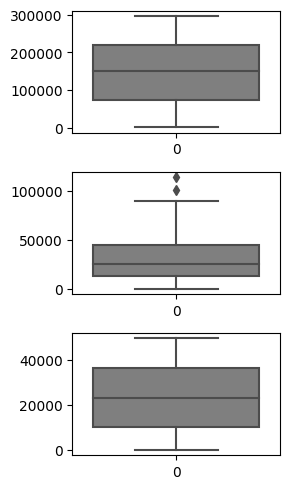

In [28]:
fig,axs = plt.subplots(3, figsize = (3,5))
plt1 = sns.boxplot(data_set['TV'], ax = axs[0],palette='binary')
plt2 = sns.boxplot(data_set['Newspaper'], ax = axs[1],palette='binary')
plt3 = sns.boxplot(data_set['Radio'], ax = axs[2],palette='binary')
plt.tight_layout()

In [29]:
data_set[data_set["Newspaper"]>90000]

,TV,Radio,Newspaper,Sales
16,67800.0,36600.0,114000.0,12500000
101,296400.0,36300.0,100900.0,23800000


<Axes: >

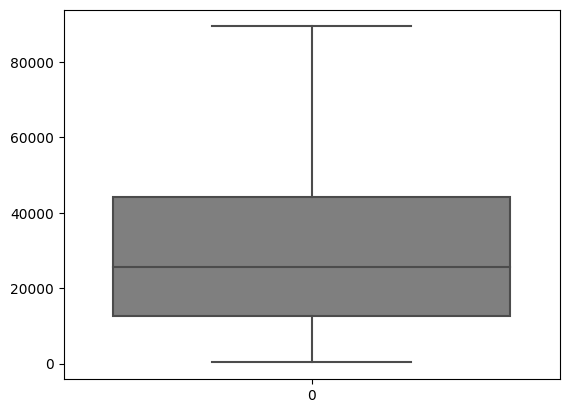

In [31]:
data_set = data_set[data_set["Newspaper"]<=90000]
sns.boxplot(data_set["Newspaper"],palette='binary')

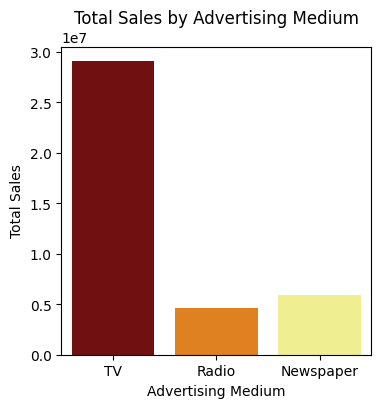

In [35]:
df_set = pd.DataFrame({
    'Advertising Medium': ['TV', 'Radio', 'Newspaper'],
    'Total Sales': data_set[['TV', 'Radio', 'Newspaper']].sum()
})

# Bar plot: Total Sales by Advertising Medium
plt.figure(figsize=(4,4))
sns.barplot(x='Advertising Medium', y='Total Sales', data=df_set, palette='afmhot')
plt.title('Total Sales by Advertising Medium')
plt.xlabel('Advertising Medium')
plt.ylabel('Total Sales')
plt.show()

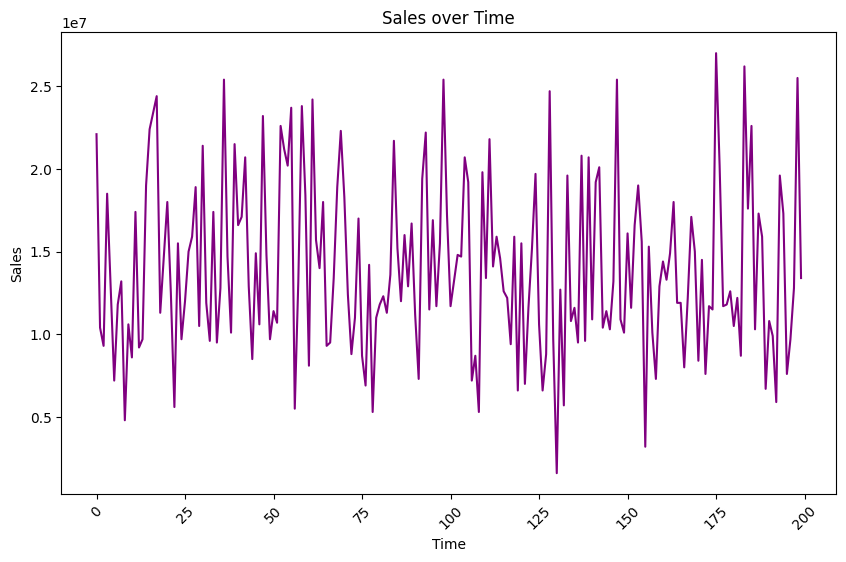

In [36]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=data_set.index, y='Sales', data=data_set, color='purple')
plt.title('Sales over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

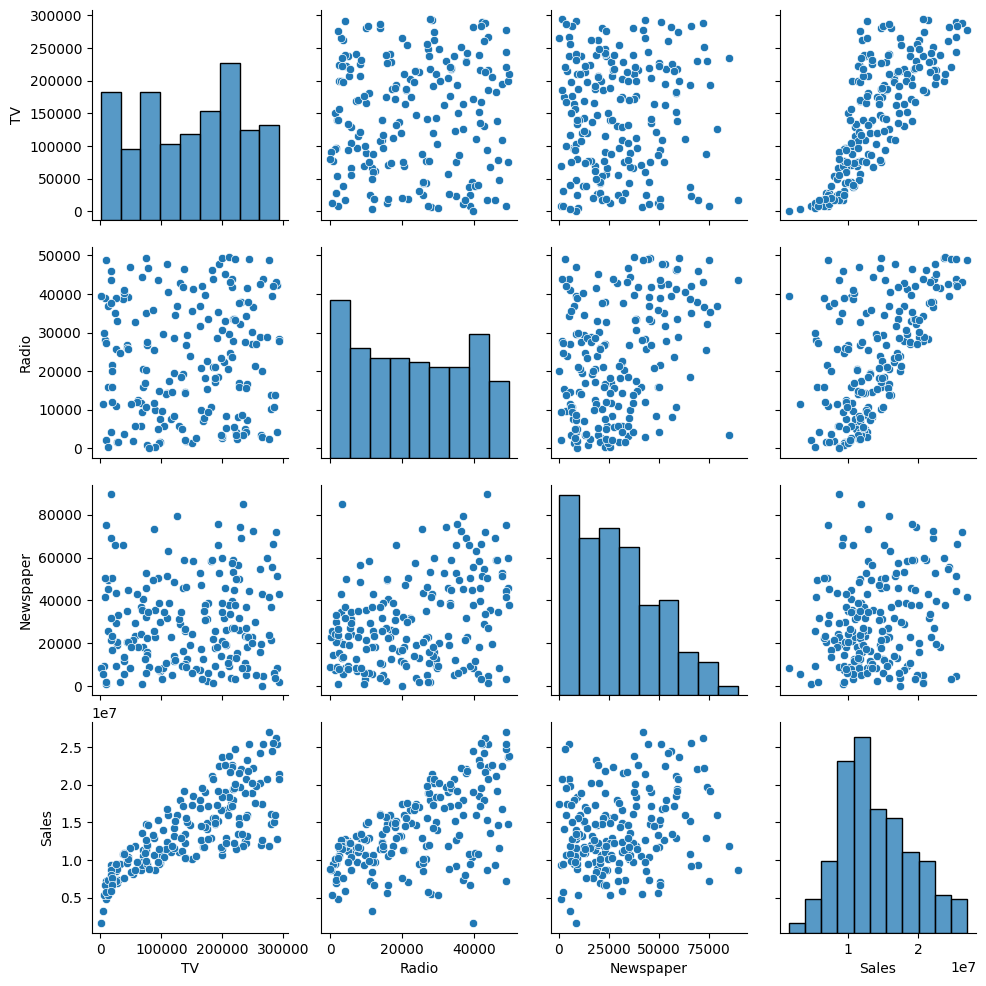

In [32]:
sns.pairplot(data_set)

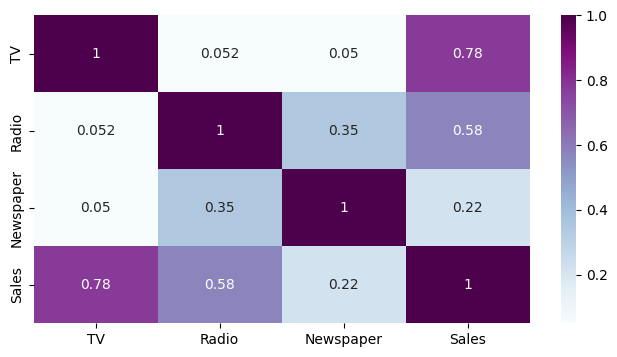

In [33]:
plt.figure(figsize=(8,4))
corr=data_set.corr()
sns.heatmap(data=abs(corr),annot=True,cmap="BuPu");

5. Model Building

In [37]:
X = data_set.drop(columns="Sales")
Y = data_set["Sales"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

1. Linear Regression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train,Y_train)

LinearRegression()

In [42]:
Y_pred=lr.predict(X_test)

In [43]:
r2_score(Y_test,Y_pred)

0.8686849180710192

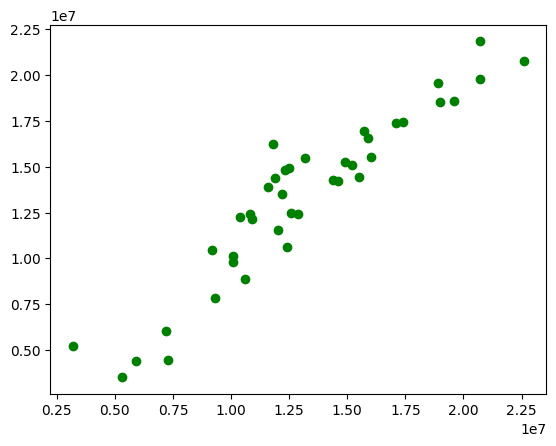

In [44]:
plt.scatter(Y_test,Y_pred,c='g')

2. Decision Tree Classifier

In [46]:
decision_regressor = DecisionTreeClassifier()

In [47]:
decision_regressor.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
Y_pred=decision_regressor.predict(X_test)

In [49]:
r2_score(Y_test,Y_pred)

0.8308320674700945

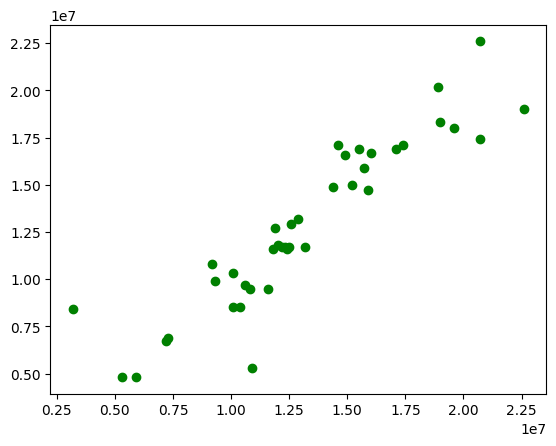

In [50]:
plt.scatter(Y_test,Y_pred,c='g')

3. Logistic Regression

In [52]:
lr2= LogisticRegression()


In [54]:
lr2.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
Y_pred=lr2.predict(X_test)

In [56]:
r2_score(Y_test,Y_pred)

0.3169631666255531

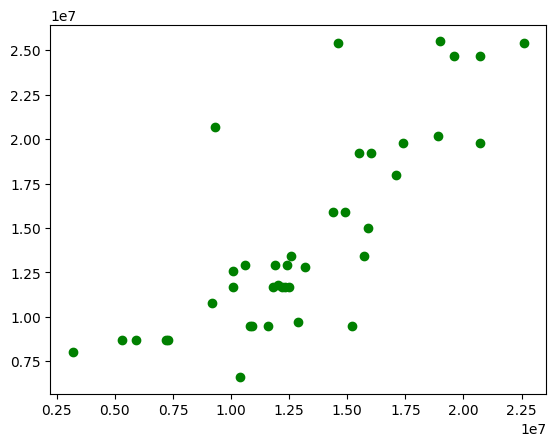

In [57]:
plt.scatter(Y_test,Y_pred,c='g')